# kNN

- 지도학습의 가장 대표적인 예시
- 다양한 레이블의 데이터 중에서, 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식

![knn](img/knn.png)

만약 k = 3이라면,

★과 가장 가까운 3개의 레이블은 🟥 2개, 🔵 1개 이므로 여기서 

★을 🟥 라고 판단하는 방법


## Data set 준비

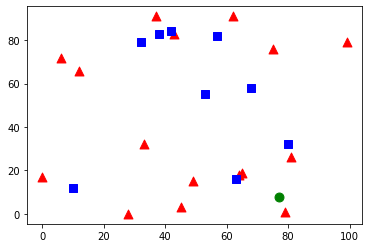

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

train_data = np.random.randint(0,100,size=(25,2)).astype(np.float32)
response = np.random.randint(0,2,size=(25,1)).astype(np.float32)

# print(response)

red = train_data[response.ravel() == 0]
blue = train_data[response.ravel() == 1]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

new_data = np.random.randint(0,100,size=(1,2)).astype(np.float32)
plt.scatter(new_data[:, 0], new_data[:, 1], 80, 'g', 'o')

## kNN 알고리즘 적용

In [17]:
knn = cv2.ml.KNearest_create()
knn.train(train_data, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(new_data, 3)

print("result", results)

result [[0.]]


## numpy로 knn 알고리즘 구현

In [57]:
import numpy as np

def create_dataset():
    train_data = np.random.randint(0,100,size=(5,2)) # 2차원의 속성 데이터
    train_labels = np.array(["Red","Red","Red","Blue","Blue"])
    return train_data, train_labels

def euclid_dist(train, test):
    dists = train - test
    dists = np.array(np.sqrt(dists[:,0]**2 + dists[:,1]**2)) # 그래프로 보면 x^2 , y^2  
    return dists

def knn(train, train_label, test, k):
    dists = euclid_dist(train, test)
    sorted_idx = dists.argsort()

    result = {}
    for i in range(k): 
        c = train_label[sorted_idx[i]] # label의 인덱스를 가져와서 그 인덱스를 result에 넣으며 count!
        result[c] = result.get(c, 0) + 1 
    return result



## classification 결과

In [67]:
train_data, train_labels = create_dataset()   
test_data = np.array([[50,20]])
result = knn(train_data, train_labels, test_data, 3)

classfication_result = max(result, key = result.get)
print(classfication_result)


Blue


## dataset 시각화

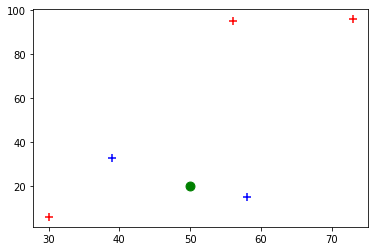

In [68]:

red = train_data[train_labels.ravel() == "Red"]
blue = train_data[train_labels.ravel() == "Blue"]

plt.scatter(red[:, 0], red[:, 1], 80, 'r', '+')
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', '+')
plt.scatter(test_data[:, 0], test_data[:, 1], 80, 'g',"o")